In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.6.0


In [ ]:
# Loading the DataSet
wafer_data_set = np.load('Wafer_Map_Datasets.npz')
wafer_images = wafer_data_set.f.arr_0
defect_labels = wafer_data_set.f.arr_1 

##Split Data in 80:10:10 for train:valid:test dataset
#X_train, X_rem, y_train, y_rem = train_test_split(wafer_images, defect_labels, train_size=0.8)
#X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
#print(X_train.shape), print(y_train.shape)
#print(X_valid.shape), print(y_valid.shape)
#print(X_test.shape), print(y_test.shape)

#Split Data in 80:20 for train:test dataset
X_train, X_test , y_train, y_test = train_test_split(wafer_images, defect_labels, train_size=0.8)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(30412, 52, 52)
(30412, 8)
(7603, 52, 52)
(7603, 8)


(None, None)

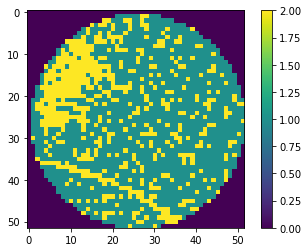

In [ ]:
# Data Pre-Processing

## Data has 0-255 pixel value range 
plt.figure()
plt.imshow(X_train[90])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Building up the Neural Network

## 1st layer - Flatten/Unstacking: 52x52 -> 1x2704 (No Parameters, only reformatting the data)
## 2nd layer - Dense: 128 nodes/neurons
## 3rd layer - Dense: 8 nodes/neurons for 8 output classes

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(52, 52)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               346240    
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 1032      
Total params: 347,272
Trainable params: 347,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model

## Loss Function - Measures accuracy of model training
## Optimizer - How model is updated based on data and Loss function
## Metrics - Monitors training/testing steps (or incorrectly classified)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics = 'accuracy')

Epoch 1/50
761/761 [==============================] - 5s 5ms/step - loss: 1.7874 - accuracy: 0.6858 - val_loss: 2.0753 - val_accuracy: 0.6664
Epoch 2/50
761/761 [==============================] - 4s 5ms/step - loss: 1.7840 - accuracy: 0.6862 - val_loss: 2.1332 - val_accuracy: 0.6350
Epoch 3/50
761/761 [==============================] - 3s 5ms/step - loss: 1.7824 - accuracy: 0.6856 - val_loss: 2.0061 - val_accuracy: 0.6875
Epoch 4/50
761/761 [==============================] - 3s 5ms/step - loss: 1.7343 - accuracy: 0.6872 - val_loss: 1.8565 - val_accuracy: 0.6895
Epoch 5/50
761/761 [==============================] - 4s 5ms/step - loss: 1.7241 - accuracy: 0.6877 - val_loss: 1.9107 - val_accuracy: 0.6918
Epoch 6/50
761/761 [==============================] - 4s 5ms/step - loss: 1.7792 - accuracy: 0.6879 - val_loss: 2.1124 - val_accuracy: 0.6704
Epoch 7/50
761/761 [==============================] - 4s 5ms/step - loss: 1.7415 - accuracy: 0.6877 - val_loss: 1.9390 - val_accuracy: 0.6860
Epoch 

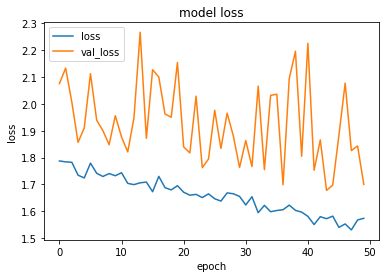

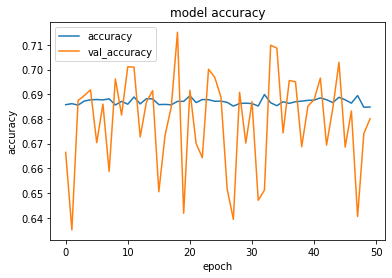

In [ ]:
# Train the Neural Network and plot the accuracy
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [99]:
# Accuracy Evaluation
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

238/238 - 0s - loss: 1.9016 - accuracy: 0.6691


In [105]:
# Predict an input image using model
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

## Gives a measure of confidence of each image for each class
predictions = probability_model.predict(X_test)
predictions[0], y_test[0]


(array([0.08700239, 0.08700239, 0.09194608, 0.23649701, 0.08705033,
        0.08700239, 0.23649701, 0.08700239], dtype=float32),
 array([0, 0, 1, 0, 0, 0, 1, 0], dtype=int32))